# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

## 선형(Linear) SVM 

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**
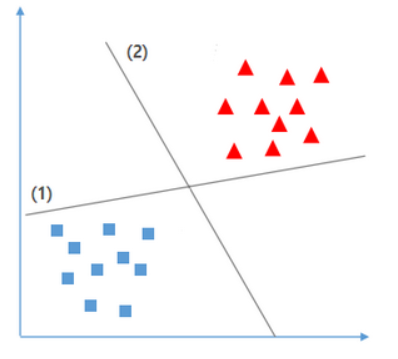

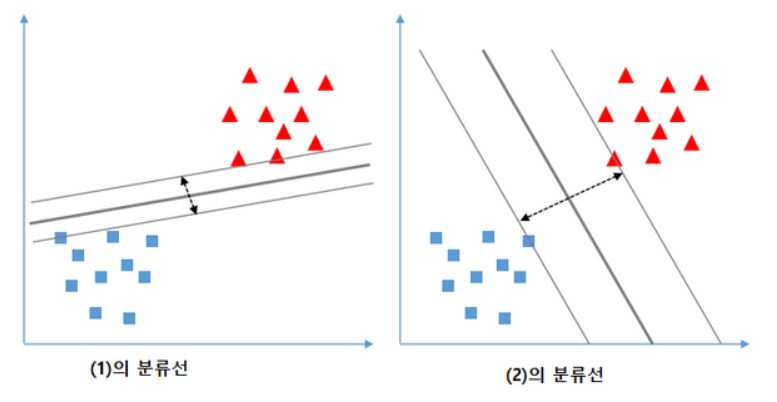

(2) 가 최적의 분류를 위한 경계선이다. 이유는 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓기 때문이다. 넓다는 것은 그만큼 겹치는 부분이 적다는 것이므로 새로운 데이터를 예측할 때 모호성이 적어져서 맞을 확률이 더 높아지게 된다. **SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수있는 경계선을 찾는 것을 목표로 한다.**

## SVM 목표: support vector간의 가장 넓은 margin을 가지는결정경계를 찾는다.

- **Support Vector**: 경계를 찾는데 기준이 되는 데이터포인트. 결정경계에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- **margin**: 두 support vector간의 너비
- SVM 모델은 학습시 margin이 넓은 결정경계를 만드는 함수를 찾는다.

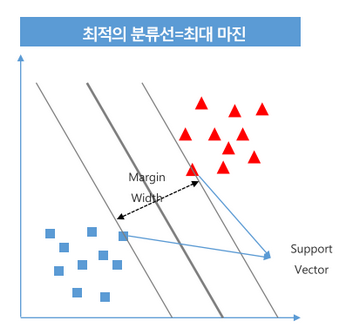

## 규제 - Hard Margin, Soft Margin

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적이다. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- **Hard Margin**
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 그래서 Support Vector와 결정 경계 사이의 거리 즉 Margin이 매우 좁아 질 수 있다. 학습시 이렇게 개별 데이터포인트들을 다 놓치지 않으려는 기준으로 결정 경계를 정해버리면 overfitting 문제가 발생할 수 있다.
- **Soft Margin**    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 Outlier들이 Margin 안에 어느정도 포함되도록 기준을 잡는다. 그래서 Support Vector와 결정 경계 사이 즉 Margin의 거리가 넓어진다. 얼마나 많은 Outlier들을 무시할 지는 하이퍼파라미터로 설정한다. 무시비율이 너무 커지면 잘 분리되야 하는 것들 까지 이상치로 판단해서 무시 하기 때문에 underfitting 문제가 발생할 수 있다.

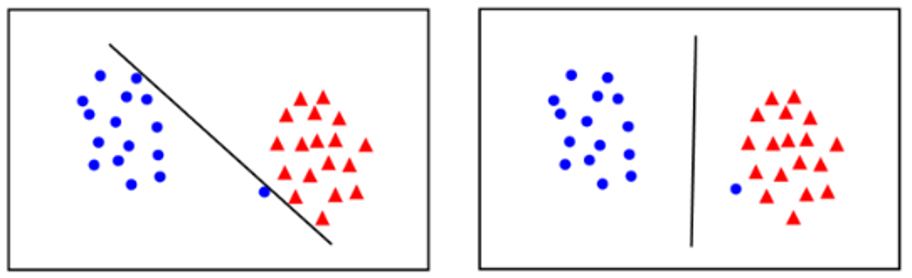

### 하이퍼파라미터 C
- Outlier 를 무시하는 비율을 설정하는 하이퍼파라미터
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파라미터인 C값을** 조정해 마진을 변경한다.
- 기본값 1
- 파라미터값을 크게주면 제약조건을 강하게 한다.
    - 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
- 파라미터값을 작게 주면 제약조건을 약하게 한다.
    - 마진폭이 넓어져 마진 오류가 커진다. 
    - 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.

### Linear SVM에서 C의 변화에 따른 성능변화 확인

- overfitting: C의 값을 줄인다.
- underfitting: C의 값을 늘린다.

##### import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### 데이터 로딩, train/test set 나누기

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

##### Feature scaling
- SVM 전처리
    - 연속형: Feature scaling
    - 범주형: One Hot Encoding

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델생성 및 학습
- 규제 파라미터인 **C** 값을 변경하면서 성능 확인

In [4]:
# 너무 작으면: soft - under fitting,  너무 크면: hard - over fitting
# from sklearn.svm import SVC, LinearSVC
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_acc_list = []
test_acc_list = []

for C in C_list:
    svc = SVC(kernel="linear", C=C, random_state=0)   #LinearSVC()
    svc.fit(X_train_scaled, y_train)
    
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [5]:
result_df = pd.DataFrame({"train":train_acc_list, 
                        "test":test_acc_list}, 
                        index=C_list)
result_df.rename_axis('C', axis=0, inplace=True)

In [6]:
result_df
# C가 높아질수록 overfitting이 발생한다.

,train,test
C,,
0.0001,0.643192,0.643357
0.0010,0.936620,0.944056
0.0100,0.978873,0.965035
0.1000,0.990610,0.958042
1.0000,0.990610,0.965035
10.0000,0.992958,0.958042
100.0000,1.000000,0.916084


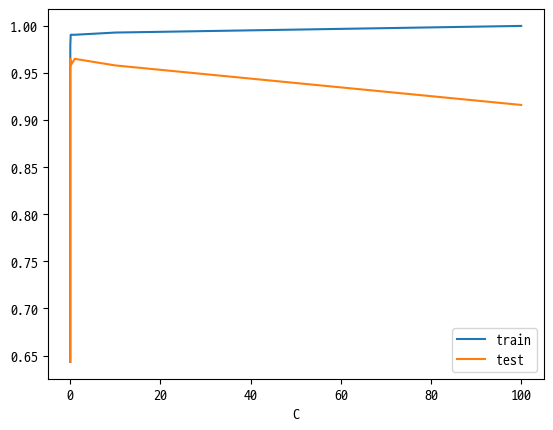

In [7]:
result_df.plot();

(0.93, 1.0)

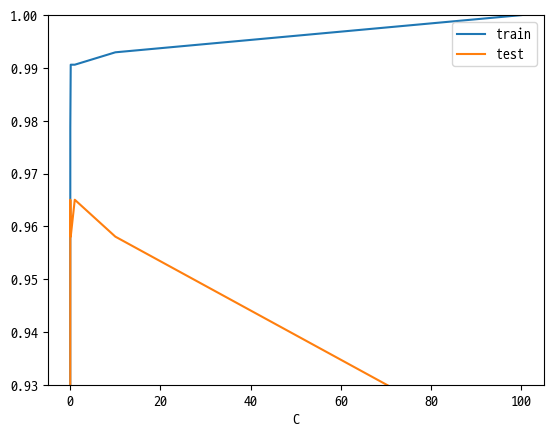

In [8]:
result_df.plot()
plt.ylim(0.93, 1.0)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
[-4. -3. -2. -1.  0.  1.  2.]


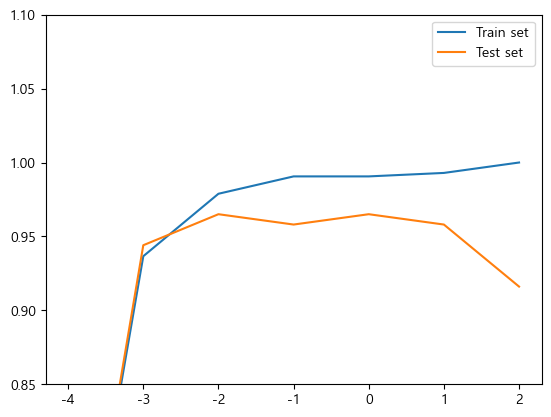

In [18]:
# y, x의 값의 차이가 크다. -> 변화 흐름을 제대로 확인하기가 어렵다.
# 0.6 -> 0.9x  ===> (0.9, 1.0)
# X: 지수적으로 증가 => log
print(C_list)
print(np.log10(np.array(C_list)))

C_list_log = np.log10(np.array(C_list))
plt.plot(C_list_log, result_df['train'], label="Train set")
plt.plot(C_list_log, result_df['test'], label="Test set")
plt.legend()
plt.ylim(0.85, 1.1)
plt.show()

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
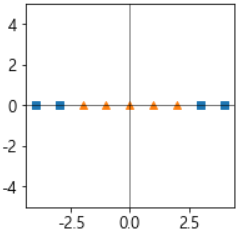

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환   
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

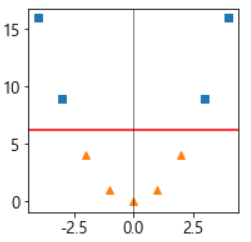

<center>[원래 공간으로 변환]</center>

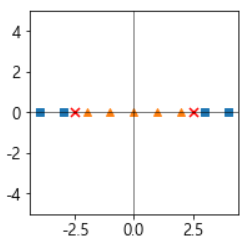

https://www.youtube.com/watch?v=OdlNM96sHio

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 하는데 이때 사용하는 함수를 **Kernel**이라고 하고 차원을 변경하는 것을 **kernel trick** 이라고 한다.
    - 대표적인 kernel함수 
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

- <b style='font-size:1.2em'>Non linear SVM 모델의 하이퍼파라미터</b>
    - C
        - 오차 허용기준관련 규제. 
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
    - gamma 
        - Kernel함수 규제 값.
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
        

In [ ]:
# C를 고정하고 gamma 값을 변경해서 모델의 복잡도를 확인
## C, gamma: 큰값 - 복잡한 모델(강한 규제), overfitting이 발생할 수 있다.
##           작은값- 단순한 모델(약한 규제), underfitting이 발생할 수 있다.
##    overfitting: C, gamma 를 감소
##    underfitting: C, gamma 를 증가.

In [21]:
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] # default: 1
train_acc_list = []
test_acc_list = []
for gamma in gamma_list:
    svc = SVC(kernel="rbf",   #rbf: 기본, 'poly', 'sigmoid', 'linear'(선형)
            C=1, #C는 고정
            gamma=gamma, 
            random_state=0)
    svc.fit(X_train_scaled, y_train)
    
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [23]:
g = np.log10(gamma_list)
result_df2 = pd.DataFrame({
    "train":train_acc_list,
    "test":test_acc_list
}, index=g)
result_df2

,train,test
-4.0,0.791080,0.797203
-3.0,0.950704,0.958042
-2.0,0.985915,0.958042
-1.0,0.995305,0.923077
0.0,1.000000,0.636364
1.0,1.000000,0.629371
2.0,1.000000,0.629371


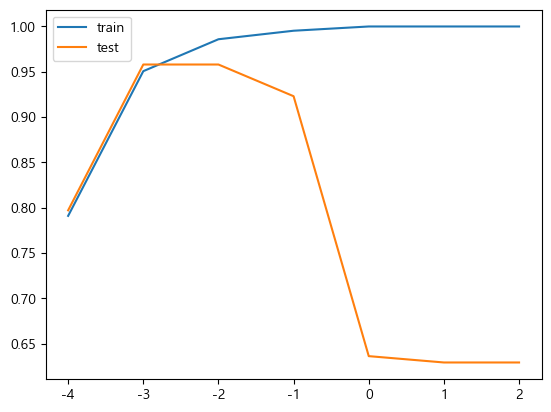

In [24]:
result_df2.plot();

##### ROC AUC score, AP score 
- 추론->predict_proba() ==> 양성의 확률

In [26]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [31]:
# SVC -> probability=True(default: False) 로 설정해야 predict_proba()-클래스별 확률-을 조회할 수 있다.
svc = SVC(C=1.0, gamma=0.001, random_state=0, probability=True)
svc.fit(X_train_scaled, y_train)
# 검증
## 추론
pos = svc.predict_proba(X_train_scaled)[:, 1]
average_precision_score(y_train, pos), roc_auc_score(y_train, pos)

(0.995579435512479, 0.9940404682825713)

## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습
- LinearSVC: C
- RBF SVC: C, gamma

In [ ]:
kernel: "linear", 'rbf'
C, gamma: 0.001, 0.01, 0.1, 1, 10
평가지표: accuracy(refit), roc_auc, average_precision    

In [33]:
# pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler",StandardScaler()), ("svm", SVC(random_state=0, probability=True))
], verbose=True)

In [34]:
# grid search
params = {
    "svm__kernel":['linear', 'rbf', "poly", "sigmoid"], 
    "svm__C":[0.001, 0.01, 0.1, 1, 10, 100],
    "svm__gamma":[0.001, 0.01, 0.1, 1, 10, 100],
    # <underfitting--------  일반환  -------- overfitting>
    
}
gs = GridSearchCV(pipeline, params, 
                  scoring=['accuracy', 'average_precision', 'roc_auc'],
                  refit='accuracy', 
                  cv=4, n_jobs=-1)

# train
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(probability=True, random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__kernel': ['linear', 'rbf']},
             refit='accuracy',
             scoring=['accuracy', 'average_precision', 'roc_auc'])

In [35]:
gs.best_score_

0.985959266443308

In [37]:
gs.best_params_

{'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}

In [42]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_accuracy').head()
# result_df.columns

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_average_precision,std_test_average_precision,rank_test_average_precision,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
61,0.011359,0.003410,0.005565,0.006766,100,0.001,rbf,"{'svm__C': 100, 'svm__gamma': 0.001, 'svm__ker...",0.981308,0.971963,...,0.995986,0.004800,11,0.992164,0.985448,1.0,1.000000,0.994403,0.006080,10
51,0.010587,0.004970,0.006201,0.003793,10,0.01,rbf,"{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kerne...",0.971963,0.971963,...,0.996724,0.003671,2,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,2
46,0.007904,0.007588,0.006915,0.007031,1,100,linear,"{'svm__C': 1, 'svm__gamma': 100, 'svm__kernel'...",0.981308,0.971963,...,0.994286,0.005922,22,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,20
36,0.014337,0.006174,0.000325,0.000343,1,0.001,linear,"{'svm__C': 1, 'svm__gamma': 0.001, 'svm__kerne...",0.981308,0.971963,...,0.994286,0.005922,22,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,20
44,0.011300,0.004828,0.000320,0.000554,1,10,linear,"{'svm__C': 1, 'svm__gamma': 10, 'svm__kernel':...",0.981308,0.971963,...,0.994286,0.005922,22,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,20
